WeatherPy2 is an anaylsis of over 600 cities and their weather data on 7/29/22. After exploring several realtionships between the weather data, the first conclusion drawn is the max temperatures of the cities tend to be higher in cities closer to the equator.

More specifically, in the Northern Hemisphere, latititude and temperature have a negative correlation. In the Southern Hemisphere, it appears latititude and temperature have a postivie correlation.

In adiition, It appears in both hempispheres, there is not a significant correlation between the latitudes of cities and their humidities.

Lastly,  It appears in both hempispheres, there is not a significant correlation between the latitudes of cities and their windspeeds.


In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# # Output File (CSV)
# file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [55]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

In [56]:
cities_df = pd.DataFrame(cities)
cities_df.rename( columns={0 :'City'}, inplace=True )
cities_df

,City
0,puerto ayora
1,yellowknife
2,lebu
3,sitka
4,bluff
...,...
642,biryusinsk
643,romny
644,ozernovskiy
645,copiapo


In [58]:
# API LOOP

base_url = "http://api.openweathermap.org/data/2.5/weather?"


# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():

# get City from df
    city = row['City']

    
# assemble url and make API request
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial" 
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    
    try:
        print(f"Processing Record {index}: {city}.")

        
        cities_df.loc[index,'Lat'] = weather_json["coord"]["lat"]
        cities_df.loc[index,'Long'] = weather_json["coord"]["lon"]
        cities_df.loc[index,'Max Temp'] = weather_json["main"]["temp_max"]
        cities_df.loc[index,'Humidity'] = weather_json["main"]["humidity"]
        cities_df.loc[index,'Cloudiness'] = weather_json["clouds"]["all"]
        cities_df.loc[index,'Wind Speed'] = weather_json["wind"]["speed"]
        cities_df.loc[index,'Country']= weather_json["sys"]["country"]
        cities_df.loc[index,'Date'] = weather_json["dt"]
        
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")
    


Processing Record 0: puerto ayora.
------------
Processing Record 1: yellowknife.
------------
Processing Record 2: lebu.
------------
Processing Record 3: sitka.
------------
Processing Record 4: bluff.
------------
Processing Record 5: qaanaaq.
------------
Processing Record 6: kaeo.
------------
Processing Record 7: mar del plata.
------------
Processing Record 8: carnarvon.
------------
Processing Record 9: hobart.
------------
Processing Record 10: mataura.
------------
Processing Record 11: jamestown.
------------
Processing Record 12: chuy.
------------
Processing Record 13: rikitea.
------------
Processing Record 14: chokurdakh.
------------
Processing Record 15: victoria.
------------
Processing Record 16: tuktoyaktuk.
------------
Processing Record 17: jinhua.
------------
Processing Record 18: talavera.
------------
Processing Record 19: bonavista.
------------
Processing Record 20: meadow lake.
------------
Processing Record 21: georgetown.
------------
Processing Record 22

Processing Record 167: ahipara.
------------
Processing Record 168: lashio.
------------
Processing Record 169: chapais.
------------
Processing Record 170: lieksa.
------------
Processing Record 171: labutta.
Missing field/result... skipping.
------------
Processing Record 172: hazorasp.
------------
Processing Record 173: sao filipe.
------------
Processing Record 174: taolanaro.
Missing field/result... skipping.
------------
Processing Record 175: orodara.
------------
Processing Record 176: tilzapotla.
------------
Processing Record 177: ormara.
------------
Processing Record 178: namibe.
------------
Processing Record 179: ambilobe.
------------
Processing Record 180: johi.
------------
Processing Record 181: tshikapa.
------------
Processing Record 182: saleaula.
Missing field/result... skipping.
------------
Processing Record 183: yulara.
------------
Processing Record 184: povenets.
------------
Processing Record 185: bengkulu.
------------
Processing Record 186: marsh harbour.

Processing Record 336: markova.
------------
Processing Record 337: saurimo.
------------
Processing Record 338: luderitz.
------------
Processing Record 339: storslett.
------------
Processing Record 340: klaksvik.
------------
Processing Record 341: southbridge.
------------
Processing Record 342: road town.
------------
Processing Record 343: juegang.
------------
Processing Record 344: nhamunda.
------------
Processing Record 345: camocim.
------------
Processing Record 346: nelson bay.
------------
Processing Record 347: brae.
------------
Processing Record 348: kozan.
------------
Processing Record 349: hami.
------------
Processing Record 350: mezen.
------------
Processing Record 351: manokwari.
------------
Processing Record 352: tabiauea.
Missing field/result... skipping.
------------
Processing Record 353: roebourne.
------------
Processing Record 354: lolua.
Missing field/result... skipping.
------------
Processing Record 355: novaya malykla.
------------
Processing Record 

Processing Record 504: morant bay.
------------
Processing Record 505: harper.
------------
Processing Record 506: tazovskiy.
------------
Processing Record 507: songjianghe.
------------
Processing Record 508: cururupu.
------------
Processing Record 509: vanderhoof.
------------
Processing Record 510: skalistyy.
Missing field/result... skipping.
------------
Processing Record 511: minab.
------------
Processing Record 512: middelharnis.
------------
Processing Record 513: portland.
------------
Processing Record 514: solovetskiy.
Missing field/result... skipping.
------------
Processing Record 515: ulladulla.
------------
Processing Record 516: ramjibanpur.
------------
Processing Record 517: shingu.
------------
Processing Record 518: novoorsk.
------------
Processing Record 519: zaraza.
------------
Processing Record 520: sioux lookout.
------------
Processing Record 521: kendal.
------------
Processing Record 522: labuan.
------------
Processing Record 523: bay roberts.
----------

In [ ]:
cities_df.to_csv("cities_df.csv")

In [59]:
cities_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,5.940000e+02
mean,20.971268,18.596525,68.376599,72.880471,56.927609,7.437643,1.659231e+09
std,33.765439,89.823520,13.209072,18.373422,41.093565,5.230462,1.099745e+02
min,-54.800000,-175.200000,33.490000,1.000000,0.000000,0.000000,1.659230e+09
25%,-6.370450,-61.636450,58.480000,63.250000,13.000000,3.475000,1.659231e+09
50%,24.652200,24.746850,70.460000,77.000000,70.000000,5.990000,1.659231e+09
75%,50.962725,95.733350,78.235000,86.000000,100.000000,10.315000,1.659231e+09
max,77.484000,179.316700,103.870000,100.000000,100.000000,26.400000,1.659231e+09


In [60]:
#Check Humidity over 100%

humidity_check = cities_df.loc[(cities_df["Humidity"] > 100), :]

humidity_check


,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


<function matplotlib.pyplot.show(*args, **kw)>

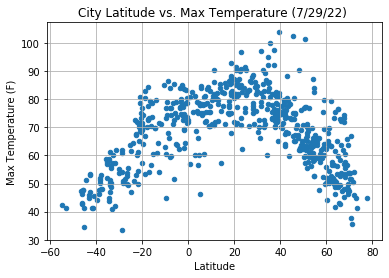

In [74]:
#Lat VS Temp Plot 

#Build Scatter Plot 
cities_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(6,4))
plt.title("City Latitude vs. Max Temperature (7/29/22) ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/LatVTemp.png")
plt.show


The graph above is mapping the relationship between the latitudes of cities and their Max Temperatures. It appears that the max temperatures tend to be higher in cities closer to the equator. 

<function matplotlib.pyplot.show(*args, **kw)>

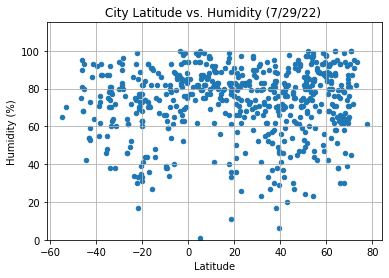

In [75]:
#Latitude VS Humidity 
cities_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(6,4))
plt.title("City Latitude vs. Humidity (7/29/22) ")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 115)
plt.savefig("../Images/LatVHumid.png")
plt.show

The graph above is mapping the relationship between the latitudes of cities and their humidities. It appears that there are humid and non-humid cities at every latitide. 


<function matplotlib.pyplot.show(*args, **kw)>

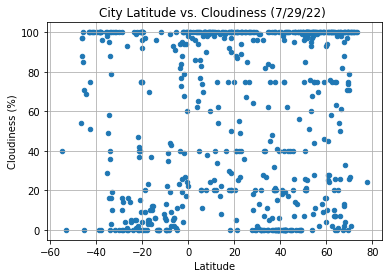

In [76]:
#Latitude VS Cloudiness
cities_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(6,4))
plt.title("City Latitude vs. Cloudiness (7/29/22) ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/LatVCloud.png")
plt.show

The graph above is mapping the relationship between the latitudes of cities and their cloudiness. It appears that there are cloudy and non-cloudy cities at every latitide. 

<function matplotlib.pyplot.show(*args, **kw)>

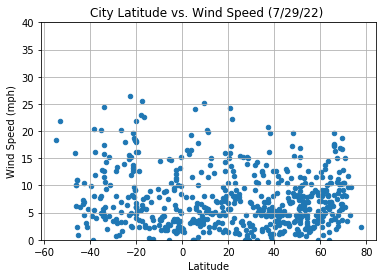

In [77]:
#Latitude VS WindSpeed
cities_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(6,4))
plt.title("City Latitude vs. Wind Speed (7/29/22) ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,40)
plt.savefig("../Images/LatVWind.png")
plt.show

The graph above is mapping the relationship between the latitudes of cities and their windspeeds. It appears that there are windy and non-windy cities at every latitide. 

In [65]:
#Southern and Northern Hemisphere Split 

north_df = cities_df.loc[(cities_df["Lat"] >= 0),:]
south_df = cities_df.loc[(cities_df["Lat"] < 0),:]


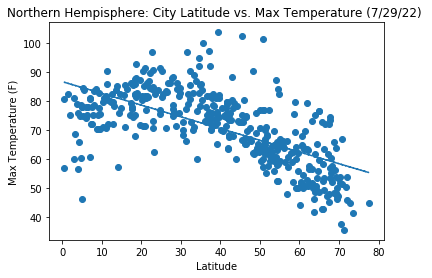

<Figure size 720x576 with 0 Axes>

In [78]:
# Calculate the linear regression model for Lat V Temp - north

n_latitiude = north_df["Lat"]
n_temp = north_df["Max Temp"]

n1_slope, n1_int, n1_r, n1_p, n1_std_err = linregress(n_latitiude,n_temp)

n1_fit = n1_slope * n_latitiude + n1_int

#Build Model 
plt.scatter(n_latitiude,n_temp)
plt.plot(n_latitiude,n1_fit,"--")
plt.title("Northern Hempisphere: City Latitude vs. Max Temperature (7/29/22) ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.figure(figsize=(10,8))
plt.savefig("../Images/NorLatVTemp.png")
plt.show()

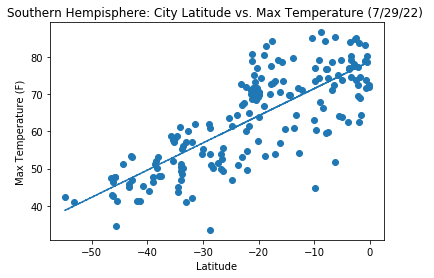

<Figure size 720x576 with 0 Axes>

In [79]:
# Calculate the linear regression model for Lat V Temp - south 

s_latitiude = south_df["Lat"]
s_temp = south_df["Max Temp"]

s1_slope, s1_int, s1_r, s1_p, s1_std_err = linregress(s_latitiude,s_temp)

s1_fit = s1_slope * s_latitiude + s1_int

#Build Model 
plt.scatter(s_latitiude,s_temp)
plt.plot(s_latitiude,s1_fit,"--")
plt.title("Southern Hempisphere: City Latitude vs. Max Temperature (7/29/22) ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.figure(figsize=(10,8))
plt.savefig("../Images/SoLatVTemp.png")
plt.show()

The graphs above are mapping the relationship between the latitudes of cities and their Max Temperatures for each of the hempispheres. It appears in the Northern Hemisphere, latititude and temperature have a negative correlation. In the Southern Hemisphere, it appears latititude and temperature have a postivie correlation.

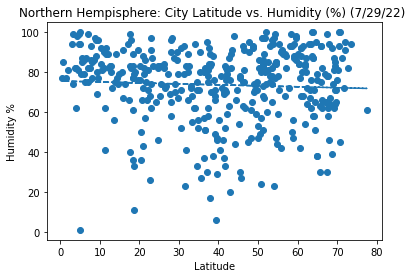

<Figure size 720x576 with 0 Axes>

In [80]:
# Calculate the linear regression model for Lat V Humidity - north

n_humidity = north_df["Humidity"]

n2_slope, n2_int, n2_r, n2_p, n2_std_err = linregress(n_latitiude,n_humidity)

n2_fit = n2_slope * n_latitiude + n2_int

#Build Model 
plt.scatter(n_latitiude,n_humidity)
plt.plot(n_latitiude,n2_fit,"--")
plt.title("Northern Hempisphere: City Latitude vs. Humidity (%) (7/29/22) ")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.figure(figsize=(10,8))
plt.savefig("../Images/NorLatVHumid.png")
plt.show()

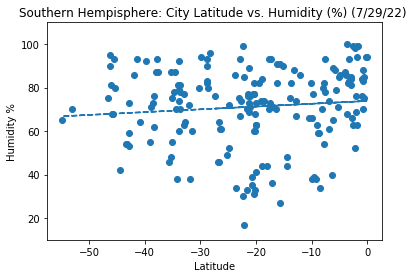

<Figure size 720x576 with 0 Axes>

In [81]:
# Calculate the linear regression model for Lat V Humidity - South 

s_humidity = south_df["Humidity"]

s2_slope, s2_int, s2_r, s2_p, s2_std_err = linregress(s_latitiude,s_humidity)

s2_fit = s2_slope * s_latitiude + s2_int

#Build Model 
plt.scatter(s_latitiude,s_humidity)
plt.plot(s_latitiude,s2_fit,"--")
plt.title("Southern Hempisphere: City Latitude vs. Humidity (%) (7/29/22) ")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.ylim(10,110)
plt.figure(figsize=(10,8))
plt.savefig("../Images/SoLatVHumid.png")
plt.show()

The graphs above are mapping the relationship between the latitudes of cities and their humidities for each of the hempispheres. It appears in both hempispheres, there is not a significant correlation between the latitudes of cities and their humidities.

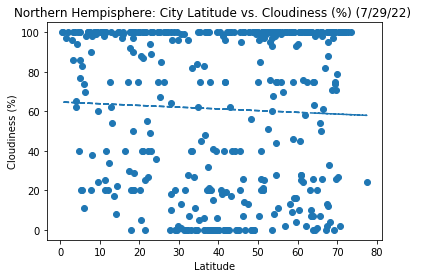

<Figure size 720x576 with 0 Axes>

In [82]:
# Calculate the linear regression model for Lat V Cloudiness - north

n_cloudiness = north_df["Cloudiness"]

n3_slope, n3_int, n3_r, n3_p, n3_std_err = linregress(n_latitiude,n_cloudiness)

n3_fit = n3_slope * n_latitiude + n3_int

#Build Model 
plt.scatter(n_latitiude,n_cloudiness)
plt.plot(n_latitiude,n3_fit,"--")
plt.title("Northern Hempisphere: City Latitude vs. Cloudiness (%) (7/29/22) ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.figure(figsize=(10,8))
plt.savefig("../Images/NorLatVCloud.png")
plt.show()

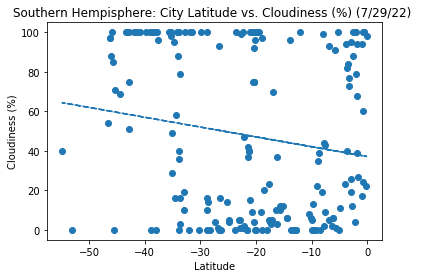

<Figure size 720x576 with 0 Axes>

In [83]:
# Calculate the linear regression model for Lat V Cloudiness - South

s_cloudiness = south_df["Cloudiness"]

s3_slope, s3_int, s3_r, s3_p, s3_std_err = linregress(s_latitiude,s_cloudiness)

s3_fit = s3_slope * s_latitiude + s3_int

#Build Model 
plt.scatter(s_latitiude,s_cloudiness)
plt.plot(s_latitiude,s3_fit,"--")
plt.title("Southern Hempisphere: City Latitude vs. Cloudiness (%) (7/29/22) ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.figure(figsize=(10,8))
plt.savefig("../Images/SoLatVCloud.png")
plt.show()



The graphs above are mapping the relationship between the latitudes of cities and their cloudiness for each of the hempispheres. It appears in both hempispheres, there is not a significant correlation between the latitudes of cities and their cloudiness.

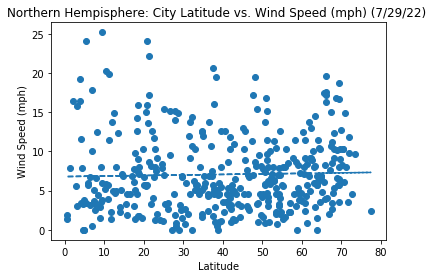

<Figure size 720x576 with 0 Axes>

In [84]:
# Calculate the linear regression model for Lat V Wind Speeds - north

n_winds = north_df["Wind Speed"]

n4_slope, n4_int, n4_r, n4_p, n4_std_err = linregress(n_latitiude,n_winds)

n4_fit = n4_slope * n_latitiude + n4_int

#Build Model 
plt.scatter(n_latitiude,n_winds)
plt.plot(n_latitiude,n4_fit,"--")
plt.title("Northern Hempisphere: City Latitude vs. Wind Speed (mph) (7/29/22) ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.figure(figsize=(10,8))
plt.savefig("../Images/NorLatVWind.png")
plt.show()

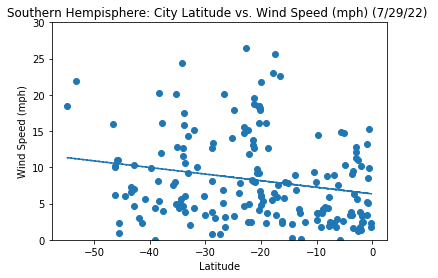

<Figure size 720x576 with 0 Axes>

In [85]:
# Calculate the linear regression model for Lat V Wind Speeds - south

s_winds = south_df["Wind Speed"]

s4_slope, s4_int, s4_r, s4_p, s4_std_err = linregress(s_latitiude,s_winds)

s4_fit = s4_slope * s_latitiude + s4_int

#Build Model 
plt.scatter(s_latitiude,s_winds)
plt.plot(s_latitiude,s4_fit,"--")
plt.title("Southern Hempisphere: City Latitude vs. Wind Speed (mph) (7/29/22) ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,30)
plt.figure(figsize=(10,8))
plt.savefig("../Images/SoLatVWind.png")
plt.show()

The graphs above are mapping the relationship between the latitudes of cities and their wind speeds for each of the hempispheres. It appears in both hempispheres, there is not a significant correlation between the latitudes of cities and their windspeeds.